# Project Goals

This project demonstrates practical application of machine learning skills by developing a predictive model for OkCupid user data. The central objective is to determine whether user profile information can accurately predict astrological signs for individuals who haven't disclosed this information. Given that astrological compatibility represents a significant matching criterion for many users, successfully predicting missing astrological signs could enhance OkCupid's ability to suggest compatible matches and improve overall user experience on the platform.

# Importing Python Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [4, 4]
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Loading the Data
Loading the profiles.csv into a DataFrame called dating_profiles. Then we briedlfly explore the DataFrame using the .head() method.

In [3]:
dating_profiles = pd.read_csv('profiles.csv', encoding='utf-8')
print(dating_profiles.head())

   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   

                                              essay0  \
0  about me:<br />\n<br />\ni would love to think...   
1  i am a chef: this is what that means.<br />\n1...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                         

In [4]:
print(dating_profiles.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

# Data Characteristics

dating_profiles has 59,946 rows and 31 columns, this is a good sign since there seems to be enough data for machine learning.
The data is in a tabular format, which is a good sign since it is easy to work with and analyze.

In [5]:
print(dating_profiles.describe())

                age        height          income
count  59946.000000  59943.000000    59946.000000
mean      32.340290     68.295281    20033.222534
std        9.452779      3.994803    97346.192104
min       18.000000      1.000000       -1.000000
25%       26.000000     66.000000       -1.000000
50%       30.000000     68.000000       -1.000000
75%       37.000000     71.000000       -1.000000
max      110.000000     95.000000  1000000.000000


# Data exploration

In [6]:
print('number of categories:',dating_profiles.sign.nunique())
print('categories:', dating_profiles.sign.unique())

number of categories: 48
categories: ['gemini' 'cancer' 'pisces but it doesn&rsquo;t matter' 'pisces'
 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'gemini but it doesn&rsquo;t matter' 'cancer but it doesn&rsquo;t matter'
 'leo but it doesn&rsquo;t matter' nan
 'aquarius but it doesn&rsquo;t matter'
 'aries and it&rsquo;s fun to think about'
 'libra but it doesn&rsquo;t matter'
 'pisces and it&rsquo;s fun to think about' 'libra'
 'taurus but it doesn&rsquo;t matter'
 'sagittarius but it doesn&rsquo;t matter' 'scorpio and it matters a lot'
 'gemini and it&rsquo;s fun to think about'
 'leo and it&rsquo;s fun to think about'
 'cancer and it&rsquo;s fun to think about'
 'libra and it&rsquo;s fun to think about'
 'aquarius and it&rsquo;s fun to think about'
 'virgo but it doesn&rsquo;t matter'
 'scorpio and it&rsquo;s fun to think about'
 'capricorn but it doesn&rsquo;t matter' 'scorpio'
 'capricorn and it&rsquo;s fun to think about' 'leo'
 'aries but it doesn&rsquo;t matter' 'aries'
 'scorpi

There should be only 12 unique signs but upon inspection we find that there are qualifiers attached with the signs.

It is imperative that we clean the labels since this is what will be predicted and 48 predictions would be quite difficult to interpret. Taking the first word of the column, the signs can be saved without the qualifiers. The qualifiers could be used for another problem down the line.

In [8]:
dating_profiles['signsCleaned'] = dating_profiles.sign.str.split().str.get(0)
print("Number of categories: ",dating_profiles.signsCleaned.nunique())
print("Categories: ",dating_profiles.signsCleaned.unique())

print(dating_profiles.signsCleaned.value_counts())

Number of categories:  12
Categories:  ['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' nan 'aries' 'libra' 'scorpio' 'capricorn']
signsCleaned
leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: count, dtype: int64


# Continuous Variables

## Age

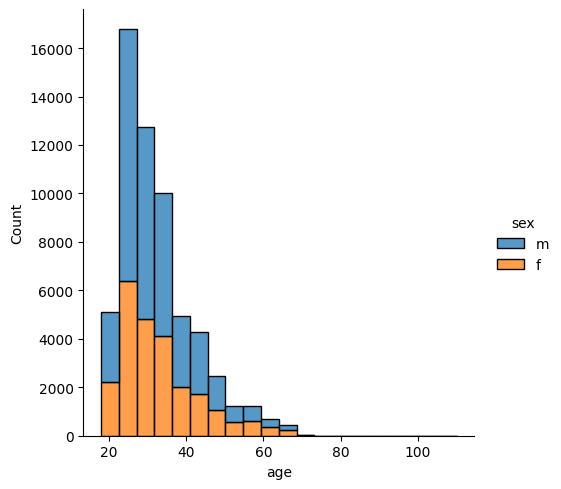

In [12]:
sns.displot(data=dating_profiles, x='age', hue='sex', kind='hist', bins=20, multiple='stack')

Here is the chart broken down by gender. It seems that there is a proportionally similar break down of gender by age, but slightly fewer females overall. 

## Height

This plot shows the distribution of the height variable.

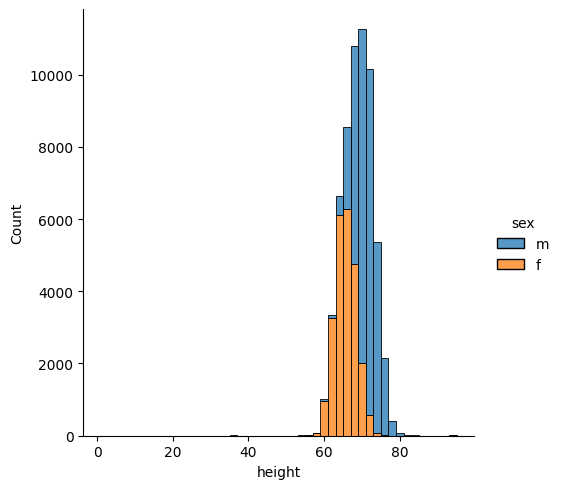

In [23]:
sns.displot(data=dating_profiles, x='height', kind='hist', hue='sex', binwidth=2, multiple='stack')

Here we have the height chart showing the break down by gender. Females tend to be shorter than males and looks to have a normal distribution. 

# Income

Here we plot the graph for income distributions, it seems that the majority of the participants do not include their income figures or do not have an income to show which could be the case for the younger age groups.

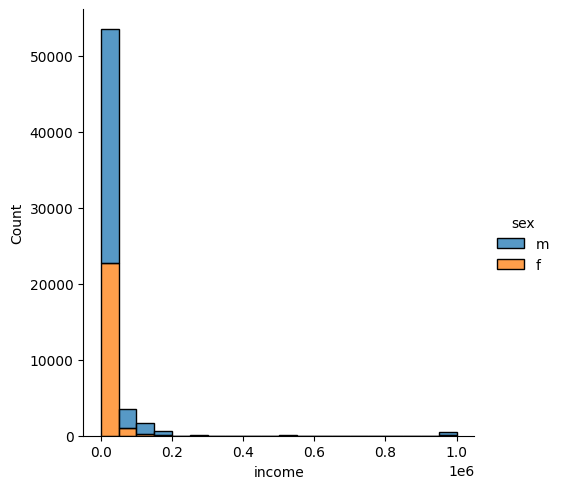

In [26]:
sns.displot(data=dating_profiles, x='income', hue='sex', kind='hist', binwidth=50000, multiple='stack')

# Movinng on to Discrete Variables

# Sex
Previously we saw that there are more males in the dataset, and it looks like there are approx. 35000 men to ~25000 women.

<Axes: xlabel='count', ylabel='sex'>

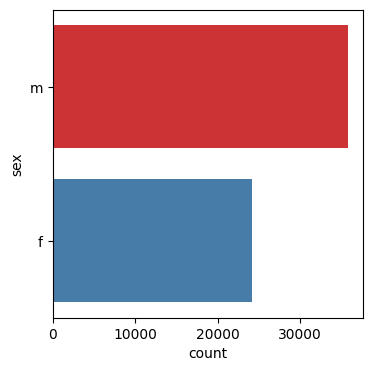

In [29]:
sns.countplot(data=dating_profiles, y='sex', palette='Set1')

# Body Type

The following chart shows the body types distribution in the dataset, and it seems that most users will describe themselves as average, fit or athletic (ranked in order of frequency).

<Axes: xlabel='count', ylabel='body_type'>

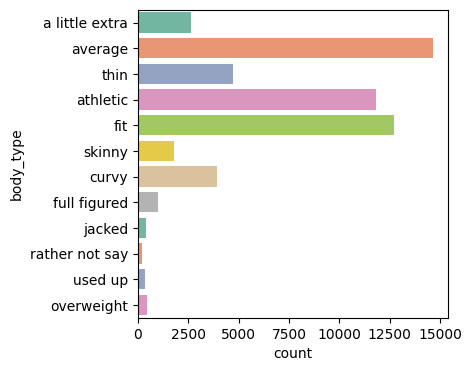

In [30]:
sns.countplot(data=dating_profiles, y='body_type', palette='Set2')

The next chart shows us the break down of body type by gender and it looks like that some of the body type descriptions are highly gendered. For example "curvy" and "full figured" are highly female descriptions, whereas males use "a little extra", and "overweight" more often.

<Axes: xlabel='count', ylabel='body_type'>

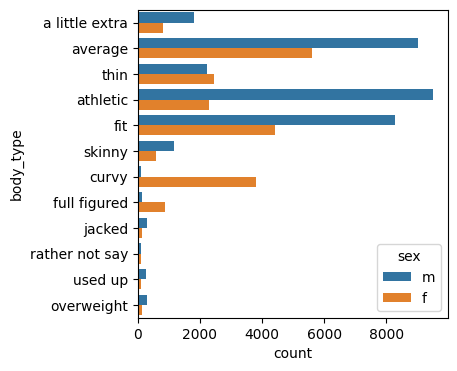

In [31]:
sns.countplot(data=dating_profiles, y='body_type', hue='sex')

# Diet
Here we plot a chart of the dietary information for users. Most users have selected "mostly anything, followed by "anything" and "strictly anything", having an open opinion is the most popular signal to potential matches.

<Axes: xlabel='count', ylabel='diet'>

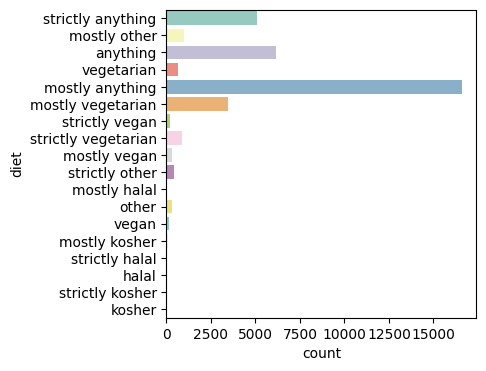

In [34]:
sns.countplot(data=dating_profiles, y='diet', palette='Set3')

# Drinks
The next plot shows the distribution of drinking preferences in the dataset. The most common option is "socially", then "rarely" and "often".

<Axes: xlabel='count', ylabel='drinks'>

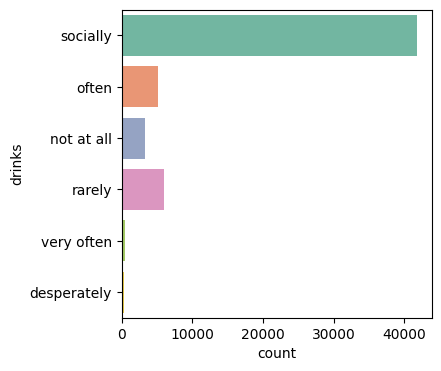

In [36]:
sns.countplot(data=dating_profiles, y='drinks', palette='Set2')

# Drugs
The majority of users "never" use drugs.

<Axes: xlabel='count', ylabel='drugs'>

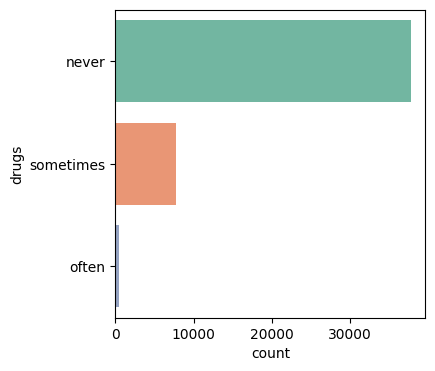

In [37]:
sns.countplot(data=dating_profiles, y='drugs', palette='Set2')

# Education
Below you will see that the majority of users are graduates from college/university followed by masters programs and those working on college/university degrees. Interstingly, space camp related options are fairly a popular option.

<Axes: xlabel='count', ylabel='education'>

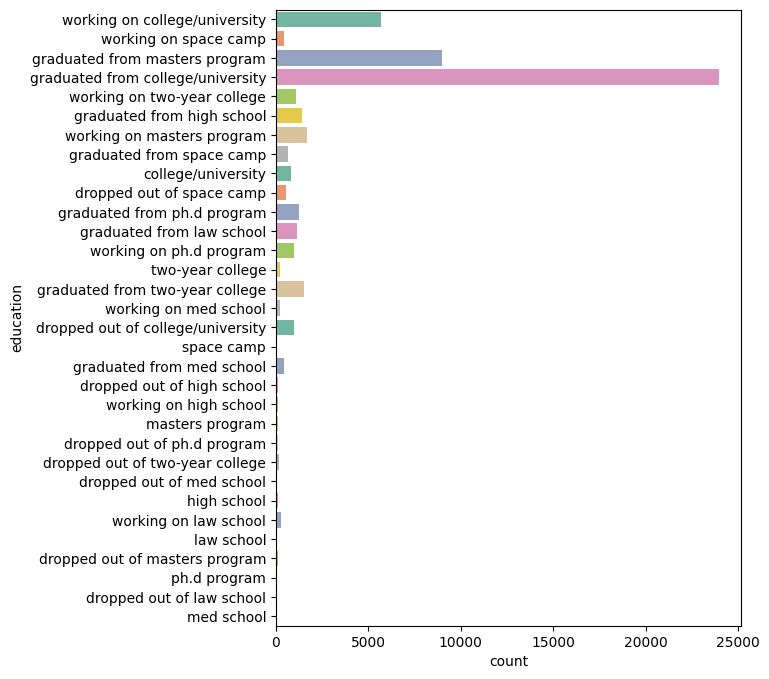

In [42]:
plt.figure(figsize=(6, 8))
sns.countplot(data=dating_profiles, y='education', palette='Set2')

# Jobs
We find that most users do not fit into the categories provided, but there is a fair share of users that are students, in the tech industry, artists and business folks.

<Axes: xlabel='count', ylabel='job'>

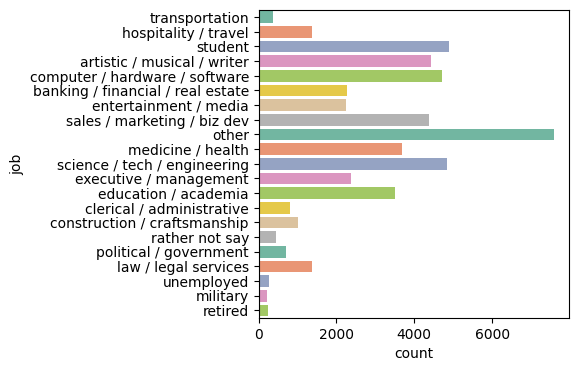

In [44]:
sns.countplot(data=dating_profiles, y='job', palette='Set2')

# Offspring
The data suggests that most users do not have kids.

<Axes: xlabel='count', ylabel='offspring'>

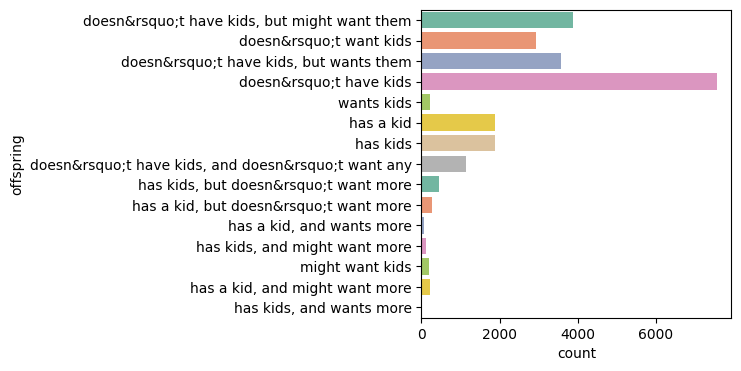

In [45]:
sns.countplot(data=dating_profiles, y='offspring', palette='Set2')

# Orientation
The majority of users are straight. But a majority of bisexual users are female.

<Axes: xlabel='count', ylabel='orientation'>

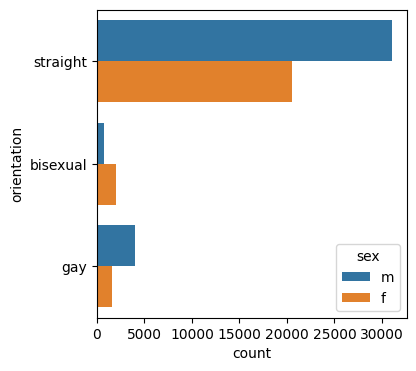

In [49]:
sns.countplot(data=dating_profiles, y='orientation', hue='sex')

# Pets


<Axes: xlabel='count', ylabel='pets'>

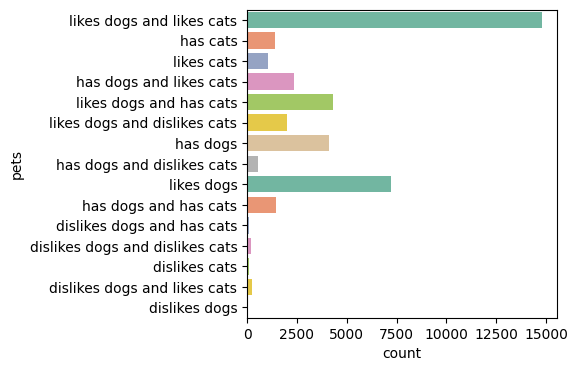

In [57]:
sns.countplot(data=dating_profiles, y='pets', palette='Set2')

# Religion
Religion has a lot of qualifiers like the 'signs' column. It is a bit of a mess. We'll clean it up and make it more readable.

<Axes: xlabel='count', ylabel='religion'>

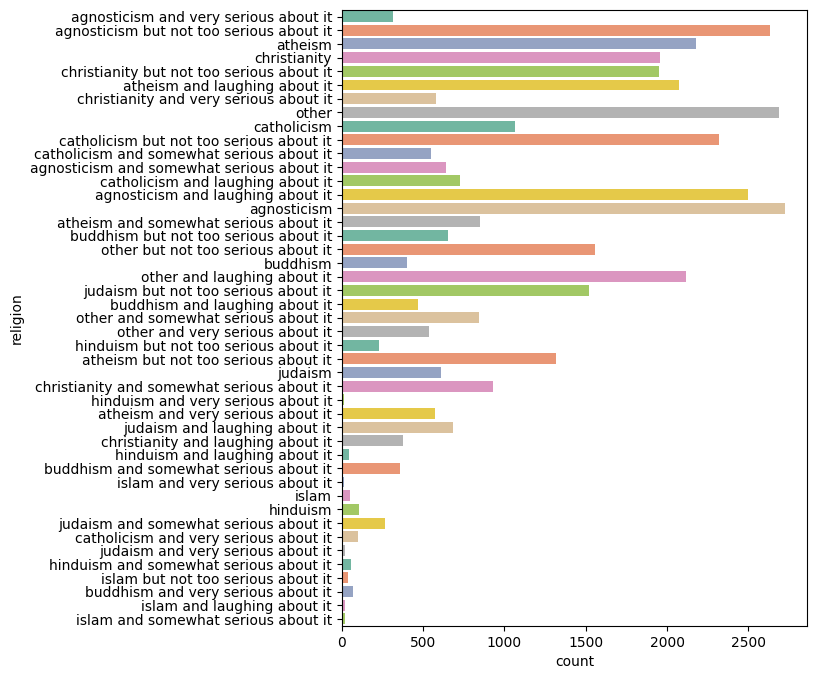

In [56]:
plt.figure(figsize=(6, 8))
sns.countplot(data=dating_profiles, y='religion', palette='Set2')

It seems like agnosticism is the most popular followed by other and atheism. Most users are not very religious.

<Axes: xlabel='count', ylabel='religionCleaned'>

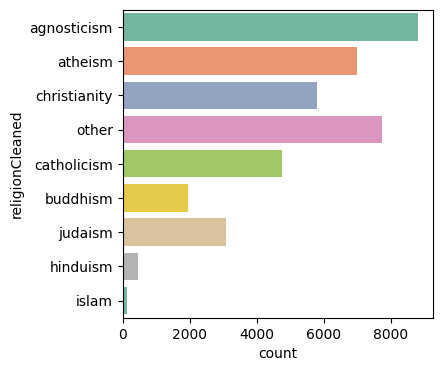

In [58]:
dating_profiles['religionCleaned'] = dating_profiles['religion'].str.split().str.get(0)
dating_profiles['religion'].value_counts()
sns.countplot(data=dating_profiles, y='religionCleaned', palette='Set2')

# Signs
We can observe that the signs are quiet evenly distributed which is normal but comparatively capricorns are most rarest while leos are most common.

<Axes: xlabel='count', ylabel='signsCleaned'>

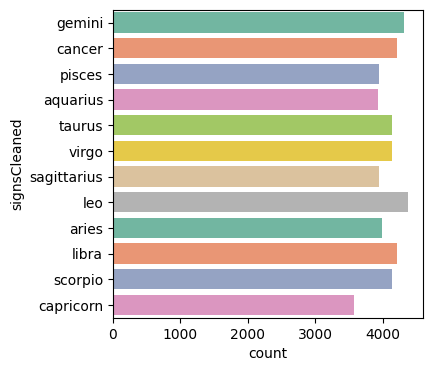

In [59]:
sns.countplot(data=dating_profiles, y='signsCleaned', palette='Set2')

# Smoking
We observe that most users are non smokers while most men are non smokers than women.

<Axes: xlabel='count', ylabel='smokes'>

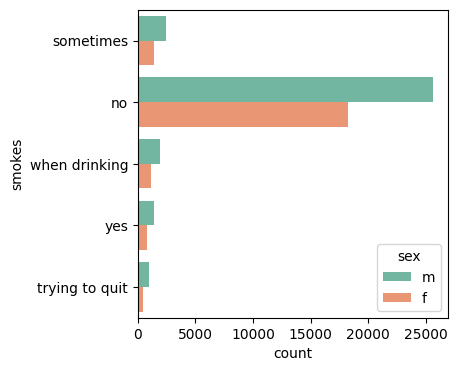

In [61]:
sns.countplot(data=dating_profiles, y='smokes', hue='sex', palette='Set2')

# Status
The relationship status for a dating website is fairly predictable. One would assume that most people are single and available which is reflected in the data.

<Axes: xlabel='count', ylabel='status'>

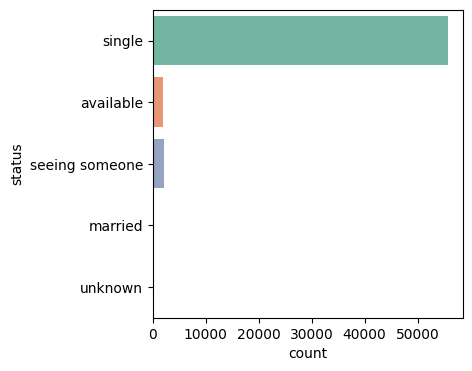

In [62]:
sns.countplot(data=dating_profiles, y='status', palette='Set2')

# Data Preparation
## Missing Data
Missing data is often not handled by machine learning algorithms well and have to be checked so they may need to be imputed or removed. It seems that many of the columns do have missing values.

In [63]:
dating_profiles.isnull().sum()

age                    0
body_type           5296
diet               24395
drinks              2985
drugs              14080
education           6628
essay0              5488
essay1              7572
essay2              9638
essay3             11476
essay4             10537
essay5             10850
essay6             13771
essay7             12451
essay8             19225
essay9             12603
ethnicity           5680
height                 3
income                 0
job                 8198
last_online            0
location               0
offspring          35561
orientation            0
pets               19921
religion           20226
sex                    0
sign               11056
smokes              5512
speaks                50
status                 0
signsCleaned       11056
religionCleaned    20226
dtype: int64

We drop the 'NA' values from the dataset to create a fully complete dataset.

In [66]:
cols = ['body_type', 'diet', 'orientation', 'pets', 'religionCleaned', 'sex', 'job', 'signsCleaned']
df = dating_profiles[cols].dropna()
df.shape

(16453, 8)

# Dummy Variables
In the next step, dummy variables are created to deal with categorical variables. The dummy variables are created by using the get_dummies() function.

In [67]:
for col in cols[:-1]:
    df = pd.get_dummies(df, columns=[col], prefix = [col])

In [68]:
print(df.head())

  signsCleaned  body_type_a little extra  body_type_athletic  \
0       gemini                      True               False   
1       cancer                     False               False   
5       taurus                     False               False   
7  sagittarius                     False               False   
9       cancer                     False                True   

   body_type_average  body_type_curvy  body_type_fit  body_type_full figured  \
0              False            False          False                   False   
1               True            False          False                   False   
5               True            False          False                   False   
7               True            False          False                   False   
9              False            False          False                   False   

   body_type_jacked  body_type_overweight  body_type_rather not say  ...  \
0             False                 False                 

# Label Imbalance
The imbalance in the dataset is a common problem in machine learning. It occurs when the number of samples in one class is significantly higher than the number of samples in another class. This can lead to biased models that perform poorly on the minority class.

In [69]:
df.signsCleaned.value_counts()

signsCleaned
leo            1516
gemini         1496
cancer         1457
virgo          1451
taurus         1390
scorpio        1356
libra          1354
pisces         1334
aries          1328
sagittarius    1312
aquarius       1262
capricorn      1197
Name: count, dtype: int64

In the given dataset, we observe that the counts of all the zodiac signs are more or less equal (i.e., without large deviations). Hence, we do not have to worry about imbalances and trying to address this problem.

# Splitting the data
Next we split the data into training and testing sets. We use 80% of the data for training and 20% for testing.

In [76]:
col_length = len(df.columns)

# Y is the target variable, X is the feature variable
X = df.iloc[:, 1:col_length]
y = df.iloc[:, 0:1]

# Validation chunk size
validation_size = 0.20

# Random seed
seed = 7

# Split the dataset into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=validation_size, random_state=seed)

# Turn into 1D array
y_train = y_train.to_numpy().ravel()
y_validation = y_validation.to_numpy().ravel()

# Model Building

We use Logistic Regression, Decision trees and KNN algorithms to predict the outcome of a multi class classification problem.

In [77]:
# We first import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [78]:
lr_model = LogisticRegression(multi_class="multinomial").fit(X_train, y_train)
lr_predictions = lr_model.predict(X_train)

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_train, lr_predictions))

              precision    recall  f1-score   support

    aquarius       0.11      0.04      0.06      1025
       aries       0.13      0.11      0.12      1066
      cancer       0.13      0.20      0.15      1165
   capricorn       0.11      0.05      0.07       948
      gemini       0.12      0.14      0.13      1188
         leo       0.13      0.24      0.17      1217
       libra       0.13      0.11      0.12      1064
      pisces       0.11      0.11      0.11      1083
 sagittarius       0.11      0.08      0.09      1048
     scorpio       0.12      0.07      0.09      1083
      taurus       0.12      0.13      0.13      1111
       virgo       0.13      0.18      0.15      1164

    accuracy                           0.12     13162
   macro avg       0.12      0.12      0.11     13162
weighted avg       0.12      0.12      0.12     13162



The final accuracy of the logistic regression model is 12% which is terrible considering a random guess should result in being correct ~8% of the time (1/12).


# K Nearest Neighbors
The next model we will be looking at is K Nearest Neighbors. This is a simple algorithm that is often used for classification tasks. It works by finding the k closest training examples in the feature space and then predicting the class of the new example based on the majority class of the k nearest neighbors.

In [87]:
knn_model = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
knn_predictions = knn_model.predict(X_train)

print(classification_report(y_train, knn_predictions))

              precision    recall  f1-score   support

    aquarius       0.34      0.88      0.49      1025
       aries       0.36      0.74      0.48      1066
      cancer       0.36      0.62      0.45      1165
   capricorn       0.35      0.50      0.41       948
      gemini       0.39      0.44      0.41      1188
         leo       0.41      0.37      0.39      1217
       libra       0.42      0.30      0.35      1064
      pisces       0.46      0.24      0.31      1083
 sagittarius       0.50      0.17      0.26      1048
     scorpio       0.58      0.17      0.26      1083
      taurus       0.62      0.15      0.25      1111
       virgo       0.66      0.15      0.25      1164

    accuracy                           0.39     13162
   macro avg       0.45      0.39      0.36     13162
weighted avg       0.46      0.39      0.36     13162



The model has an accuracy of 39% which is a lot better than the 12% accuracy of the logistic regression model. Let's see if we can improve the accuracy of the model by using a different model.

# Decision Tree Classifier
The last model we will be implementing is the decision tree classifier. This is a supervised learning algorithm that is used for classification tasks. It is a type of supervised learning algorithm that is used for classification tasks. It is a type of supervised learning algorithm that is used for classification tasks. We set the max_depth as none.

In [88]:
dt_model = DecisionTreeClassifier().fit(X_train, y_train) 
dt_predictions = dt_model.predict(X_train)

print(classification_report(y_train, dt_predictions))

              precision    recall  f1-score   support

    aquarius       0.66      0.92      0.77      1025
       aries       0.66      0.88      0.76      1066
      cancer       0.69      0.87      0.77      1165
   capricorn       0.73      0.81      0.77       948
      gemini       0.78      0.77      0.78      1188
         leo       0.79      0.79      0.79      1217
       libra       0.78      0.76      0.77      1064
      pisces       0.79      0.73      0.76      1083
 sagittarius       0.85      0.70      0.77      1048
     scorpio       0.89      0.70      0.78      1083
      taurus       0.91      0.67      0.77      1111
       virgo       0.93      0.67      0.78      1164

    accuracy                           0.77     13162
   macro avg       0.79      0.77      0.77     13162
weighted avg       0.79      0.77      0.77     13162



In [101]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
dt_cm = confusion_matrix(y_train, dt_predictions)
# Store class labels separately
class_labels = dt_model.classes_

In [102]:
dt_model.get_depth()

55

[Text(0, 0.5, 'aquarius'),
 Text(0, 1.5, 'aries'),
 Text(0, 2.5, 'cancer'),
 Text(0, 3.5, 'capricorn'),
 Text(0, 4.5, 'gemini'),
 Text(0, 5.5, 'leo'),
 Text(0, 6.5, 'libra'),
 Text(0, 7.5, 'pisces'),
 Text(0, 8.5, 'sagittarius'),
 Text(0, 9.5, 'scorpio'),
 Text(0, 10.5, 'taurus'),
 Text(0, 11.5, 'virgo')]

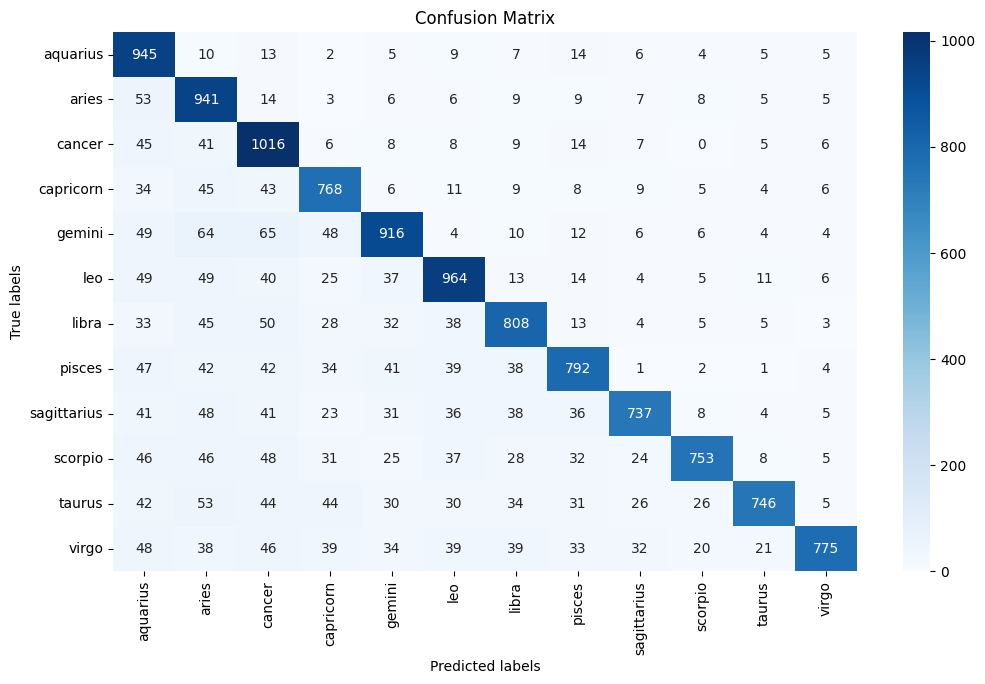

In [103]:
plt.figure(figsize=(12,7))

ax = plt.subplot()
sns.heatmap(dt_cm, annot=True, ax=ax, fmt='d', cmap='Blues')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.set_xticklabels(class_labels, rotation=90)
ax.set_yticklabels(class_labels, rotation=0)

Seeing the matrix, the decision tree has a depth of 55 branches, which will not generalize to a different dataset. In this case this model has been "overfit" to the data.

We now use a five fold cross validation is created with the same data. The results are worse than the KNN and about the Logistic Regression algorithms. the baseline was ~9%

In [105]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
results = cross_val_score(dt_model, X_train, y_train, cv=kfold, scoring='accuracy')

print(results)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[0.07668945 0.09870919 0.08662614 0.09574468 0.07522796 0.07522796
 0.08282675 0.08586626 0.08358663 0.07598784]
Baseline: 8.36% (0.80%)


We will build the decision tree model but with a max_depth of 20 to stop the algorithm fro reaching the maximum depth of the tree when we set the max_depth parameter to None.

In [107]:
dt_model20 = DecisionTreeClassifier(max_depth = 20).fit(X_train, y_train) 
dt_predictions20 = dt_model20.predict(X_train)

print(classification_report(y_train, dt_predictions20))

              precision    recall  f1-score   support

    aquarius       0.47      0.32      0.38      1025
       aries       0.26      0.37      0.31      1066
      cancer       0.37      0.34      0.35      1165
   capricorn       0.52      0.26      0.35       948
      gemini       0.22      0.44      0.30      1188
         leo       0.21      0.48      0.29      1217
       libra       0.54      0.30      0.38      1064
      pisces       0.47      0.31      0.37      1083
 sagittarius       0.61      0.22      0.33      1048
     scorpio       0.23      0.37      0.28      1083
      taurus       0.60      0.27      0.37      1111
       virgo       0.73      0.23      0.35      1164

    accuracy                           0.33     13162
   macro avg       0.44      0.33      0.34     13162
weighted avg       0.43      0.33      0.34     13162



In [108]:
results20 = cross_val_score(dt_model20, X_train, y_train, cv=kfold, scoring='accuracy')

print(results20)
print("Baseline: %.2f%% (%.2f%%)" % (results20.mean()*100, results.std()*100))

[0.08504176 0.1055429  0.09194529 0.09346505 0.07142857 0.08890578
 0.08130699 0.07978723 0.08206687 0.09194529]
Baseline: 8.71% (0.80%)


# Final Model
So it seems that the knn_model is the best model for this data set.

In [111]:
knn_predictionsVal = knn_model.predict(X_validation) 
print(classification_report(y_validation, knn_predictionsVal))

              precision    recall  f1-score   support

    aquarius       0.06      0.18      0.09       237
       aries       0.07      0.14      0.09       262
      cancer       0.08      0.15      0.11       292
   capricorn       0.07      0.09      0.08       249
      gemini       0.08      0.08      0.08       308
         leo       0.09      0.08      0.09       299
       libra       0.07      0.04      0.05       290
      pisces       0.08      0.04      0.06       251
 sagittarius       0.08      0.03      0.04       264
     scorpio       0.10      0.03      0.04       273
      taurus       0.04      0.01      0.02       279
       virgo       0.13      0.03      0.06       287

    accuracy                           0.08      3291
   macro avg       0.08      0.08      0.07      3291
weighted avg       0.08      0.08      0.07      3291



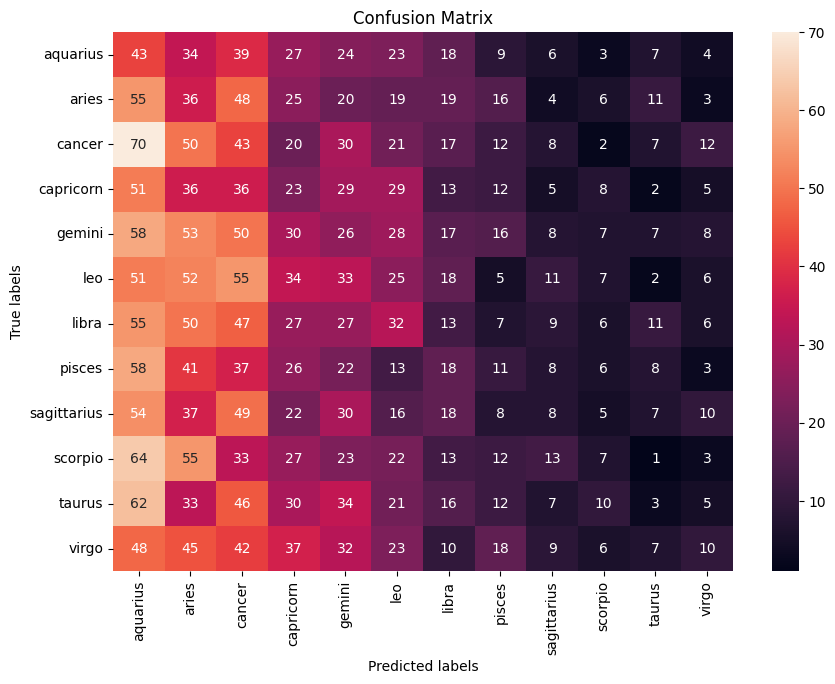

In [112]:
final_cm = confusion_matrix(y_validation, knn_predictionsVal)
knn_labels = knn_model.classes_

plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(final_cm, annot=True, ax = ax, fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(knn_labels); 
ax.yaxis.set_ticklabels(knn_labels);

# Conclusion
In this project machine learning was used to predict the astrological signs of OkCupid users. This is an important feature since many people believe in astrology and matches between compatible star signs. If users don't input their signs, an algorithmic solution could have generated a sign to impute missing data when making matches.

Alas, the final selected algorithm did no better than basic guessing.